# Energy Loss distribution with python

$\dfrac{dN}{dy}=NL\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))dn_\gamma(\omega_0,T)d\omega_0\dfrac{d\Omega}{4\pi}$

In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import math 
import scipy.special
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import constants

In [3]:
re = constants.value('classical electron radius')
m_eJ = constants.m_e*constants.c**2
print(m_eJ)
m_eeV= m_eJ/constants.eV
m_eGeV=m_eeV/1e9
print(m_eGeV)
print(constants.hbar)
print(constants.k)

8.187105776823886e-14
0.0005109989499961642
1.0545718176461565e-34
1.380649e-23


In [4]:
def integrand(w_i,y,E_i,alpha,T):

    def N_p(w_i,T):
        return (w_i**2)/((math.pi**2)*(constants.c**3)*(constants.hbar**3)*(math.exp(w_i/(constants.k*T))-1))
    def x_fun(E_i,w_i,alpha):
        return (4*E_i*w_i*math.cos(alpha/2)**2)/(m_eJ**2)
    def sigma_c(y,x,r):
        return (2*math.pi*(re**2)/x)*(1/(1-y)+1-y-4*r*(1-r))
    def r_fun(x,y):
        return y/(x*(1-y))
    
    x_f=x_fun(E_i,w_i,alpha)
    r_f=r_fun(x_f,y)
    N_f=N_p(w_i,T)
    sigma_f=sigma_c(y,x_f,r_f)
    
    return sigma_f*(1+math.cos(alpha))*20.2*T**3#*((w_i**2)/(((math.pi**2)*(constants.c**3)*(constants.hbar**3))*(math.exp(w_i/constants.k*T)-1)))

def lower_lim(y,E_i,alpha):
    return (y*m_eJ**2)/(4*(1-y)*E_i*math.cos(alpha/2)**2)

E_testeV=5e11
E_i=E_testeV*1.60218e-19
T=300
alpha=2
N=10e12
L=5000
#y=0.2
#w_min = lower_lim(y,E_i,alpha)

#x_testr=np.array(np.linspace(0.1,0.5,1000))
#y_testr=integrand(x_testr,0.2,E_i,alpha,T)i
#plt.figure(1)
#plt.plot(x_testr,y_testr)

x_range=[]
y_range=[]

y_lim=np.linspace(0,0.5,1000)
for y in y_lim:
    w_min=lower_lim(y,E_i,alpha)
    integral, error=integrate.quad(integrand,w_min,np.inf,args=(y,E_i,alpha,T))
    result = N*L*integral/4
    y_range.append(result)
    x_range.append(y)

plt.figure(2)
plt.plot(x_range,y_range)

OverflowError: math range error

In [5]:
def integrand(w_i,y,E_i,alpha,T):

    def N_p(w_i,T):
        return (w_i**2)/((math.pi**2)*(math.exp(w_i/T-1)))
    def x_fun(E_i,w_i,alpha):
        return (4*E_i*w_i*math.cos(alpha/2)**2)/(0.511e6**2)
    def sigma_c(y,x,r):
        return (1/x)*(1/(1-y)+1-y-4*r*(1-r))
    def r_fun(x,y):
        return y/(x*(1-y))
    
    x_f=x_fun(E_i,w_i,alpha)
    r_f=r_fun(x_f,y)
    N_f=N_p(w_i,T)
    sigma_f=sigma_c(y,x_f,r_f)
    
    return sigma_f*(1+math.cos(alpha))*N_f

def lower_lim(y,E_i,alpha):
    return (y*0.511e6**2)/(4*(1-y)*E_i*math.cos(alpha/2)**2)

#E_testeV=5e11
E_i=5e11
#E_i=E_testeV*1.60218e-19
T=300
alpha=2
N=10e12
L=5000
#y=0.2
#w_min = lower_lim(y,E_i,alpha)

#x_testr=np.array(np.linspace(0.1,0.5,1000))
#y_testr=integrand(x_testr,0.2,E_i,alpha,T)i
#plt.figure(1)
#plt.plot(x_testr,y_testr)

x_range=[]
y_range=[]

y_lim=np.linspace(0,0.5,1000)
for y in y_lim:
    w_min=lower_lim(y,E_i,alpha)
    integral, error=integrate.quad(integrand,w_min,np.inf,args=(y,E_i,alpha,T))
    result = N*L*integral/4
    y_range.append(result)
    x_range.append(y)

plt.figure(2)
plt.plot(x_range,y_range)

OverflowError: math range error

[1.4383559945940548e-05, 8.635880746053243e-05, 0.0001583338148656667, 0.00023030858216194417, 0.0003022831093499655, 0.00037425739643033145, 0.0004462314434036428, 0.0005182052502705005, 0.0005901788170315051, 0.0006621521436872569, 0.0007341252302383576, 0.0008060980766854073, 0.0008780706830290066, 0.0009500430492697568, 0.0010220151754082583, 0.0010939870614451118, 0.0011659587073809185, 0.0012379301132162779, 0.0013099012789517923, 0.0013818722045880615, 0.0014538428901256868, 0.0015258133355652685, 0.0015977835409074072, 0.0016697535061527041, 0.001741723231301759, 0.0018136927163551744, 0.0018856619613135488, 0.0019576309661774854, 0.0020295997309475824, 0.002101568255624442, 0.002173536540208665, 0.0022455045847008513, 0.0023174723891016013, 0.0023894399534115183, 0.0024614072776311994, 0.002533374361761248, 0.0026053412058022634, 0.002677307809754847, 0.0027492741736196004, 0.002821240297397121, 0.0028932061810880132, 0.0029651718246928756, 0.00303713722821231, 0.0031091023916

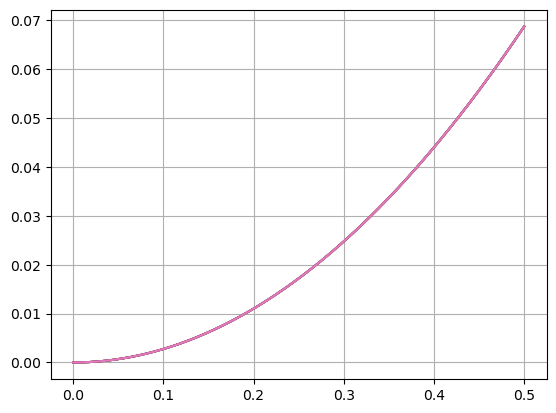

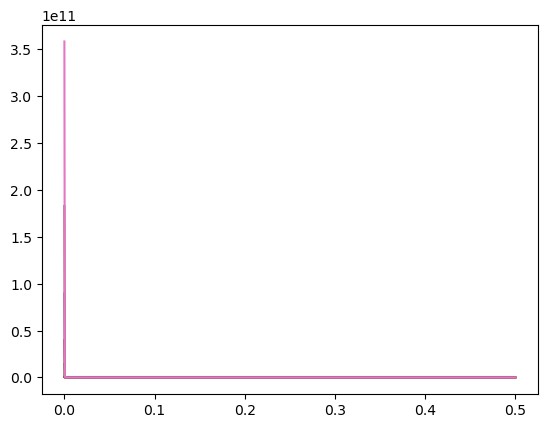

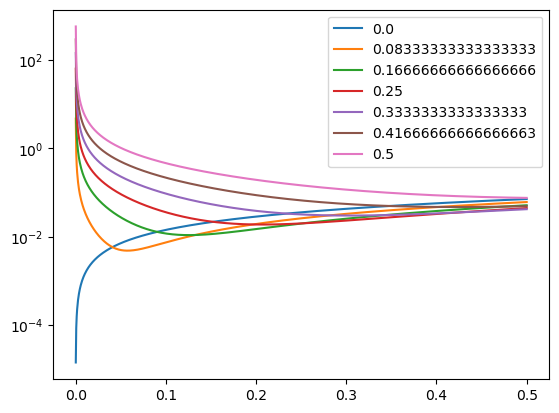

In [7]:
#Plotting tests
E_i=5e11
#E_i=E_testeV*1.60218e-19
T=300
alpha=2
N=10e12
L=5000

def N_p(w_i,T):
    return (w_i**2)/((math.pi**2)*(math.exp(w_i/(T)-1)))

def sigma_c(y,x,r):
    return (1/x)*(1/(1-y)+1-y-4*r*(1-r))
#2*math.pi*1.956e-6**2
#def sigma_c2(y,x):
 #   return (2*math.p*)

def x_fun(E_i,w_i,alpha):
    return (4*E_i*w_i*np.cos(alpha/2)**2)/((0.511e+6)**2)

def r_fun(x,y):
    return y/(x*(1-y))

#w_max=x_fun()/(x_fun()+1)*E_i

w_i=np.linspace(0.0001,0.5,1000)

y_test = np.linspace(0,0.5,7)

plt.grid(True)
for y in y_test:
    N_pr=[]
    sigma_cr=[]
    result_pr=[]
    for w in w_i:
        N_tesi=N_p(w,300)
        sigma_tesi=sigma_c(y,x_fun(E_i,w,alpha),r_fun(x_fun(E_i,w,alpha),y))
        N_pr.append(N_tesi)
        sigma_cr.append(sigma_tesi)
        inte=sigma_tesi*N_tesi*(1+np.cos(alpha))
        result_pr.append(inte)
    plt.figure(1)
    plt.plot(w_i,N_pr)
    plt.figure(2)
    plt.plot(w_i,sigma_cr)
    plt.figure(3)
    plt.plot()
    if y==0:
        print(result_pr)
    plt.semilogy(w_i,result_pr)
    plt.legend([str(y)for y in y_test])


## Correcting the integral differencials

$\dfrac{dN}{dy}=NL\displaystyle\int_{0}^{\pi}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}(\omega_0,T)\frac{d\Omega}{4\pi}$

taking the change in the differencial of the solid angle to be able of integrate over de incident angle of the laser:

$x=\dfrac{4E_0\omega_0\cos^2(\alpha/2)}{m_e^2c^4}=\dfrac{2E_0\omega_0(1+\cos(\alpha))}{m_e^2c^4}$

$\dfrac{dN}{dy}=-\dfrac{NL}{4\pi}\displaystyle\int_{0}^{2\pi}\int_{0}^{1/2}\int_{\omega_{min}}^{\infty}\dfrac{d\sigma_c}{dy}(1+\cos(\alpha))\dfrac{dn_\gamma}{d\omega_o}d\cos(\alpha)d\phi$

In [6]:
math.pi*constants.value('classical electron radius')**2

2.4946720245563428e-29

In [8]:
def integrand(w_i,C_a,y,E_i,T):

    def N_p(w_i,T):
        return (w_i**2)/((math.pi**2)*(math.exp(w_i/(T)-1)))

    def sigma_c(y,x,r):
        return (1/x)*(1/(1-y)+1-y-4*r*(1-r))
    #2*math.pi*1.956e-6**2
    
    def x_fun(E_i,w_i,C_a):
        return (2*E_i*w_i*(1+C_a))/((0.511e+6)**2)

    def r_fun(x,y):
        return y/(x*(1-y)) 
    
    x_f=x_fun(E_i,w_i,C_a)
    r_f=r_fun(x_f,y)
    N_f=N_p(w_i,T)
    sigma_f=sigma_c(y,x_f,r_f)
    
    return sigma_f*(1+C_a)*N_f

def w_lims(y,E_i,C_a):
    return [(y*0.511e6**2)/(2*(1-y)*E_i*(1+C_a)),np.inf]

#E_testeV=5e11
E_i=5e11
#E_i=E_testeV*1.60218e-19
T=300
N=10e12
L=5000
#y=0.2
#w_min = lower_lim(y,E_i,alpha)






#x_testr=np.array(np.linspace(0.1,0.5,1000))
#y_testr=integrand(x_testr,0.2,E_i,alpha,T)i
#plt.figure(1)
#plt.plot(x_testr,y_testr)

#C_a=0.25
#x_range=[]
#y_range=[]
#y_lim=np.linspace(0,0.5,1000)
#for y_i in y_lim:
#    w_min=lower_lim(y_i,E_i,C_a)
#    integral, error=integrate.nquad(integrand,[[w_min,np.inf],[0,1/2]],args=(y_i,T,E_i))
#    result = -N*L*integral*2*np.pi
#    y_range.append(result)
#    x_range.append(y_i)
#plt.figure(2)
#plt.semilogy(x_range,y_range)

In [ ]:
def f(t,s):
    return t*s

def tlimit():
    return [0,5]

def t